In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Step 1: Load the Dataset**
We'll start by loading the dataset and taking a preliminary look at the first few rows and the data types of each column.

In [5]:
import pandas as pd

# Load the dataset
data = 'data.csv'
data = pd.read_csv(data)

# Display the first few rows of the dataframe
print(data.head())

# Display the data types of each column
print(data.dtypes)


   Unnamed: 0  age      gender year_in_school             major  \
0           0   19  Non-binary       Freshman        Psychology   
1           1   24      Female         Junior         Economics   
2           2   24  Non-binary         Junior         Economics   
3           3   23      Female         Senior  Computer Science   
4           4   20      Female         Senior  Computer Science   

   monthly_income  financial_aid  tuition  housing  food  transportation  \
0             958            270     5939      709   296             123   
1            1006            875     4908      557   365              85   
2             734            928     3051      666   220             137   
3             617            265     4935      652   289             114   
4             810            522     3887      825   372             168   

   books_supplies  entertainment  personal_care  technology  health_wellness  \
0             188             41             78         134 

**Step 2: Data Preprocessing**

In [6]:
# Check for missing values
missing_values = data.isnull().sum()

# Assuming we want to fill missing numeric values with the median
for column in data.select_dtypes(include=['int64']).columns:
    median = data[column].median()
    data[column] = data[column].fillna(median)

# For categorical data, we could fill missing values with the mode
for column in data.select_dtypes(include=['object']).columns:
    mode = data[column].mode()[0]
    data[column] = data[column].fillna(mode)

# Check missing values again to ensure all are handled
missing_values_post = data.isnull().sum()
missing_values, missing_values_post


(Unnamed: 0                  0
 age                         0
 gender                      0
 year_in_school              0
 major                       0
 monthly_income              0
 financial_aid               0
 tuition                     0
 housing                     0
 food                        0
 transportation              0
 books_supplies              0
 entertainment               0
 personal_care               0
 technology                  0
 health_wellness             0
 miscellaneous               0
 preferred_payment_method    0
 dtype: int64,
 Unnamed: 0                  0
 age                         0
 gender                      0
 year_in_school              0
 major                       0
 monthly_income              0
 financial_aid               0
 tuition                     0
 housing                     0
 food                        0
 transportation              0
 books_supplies              0
 entertainment               0
 personal_care          

**Step 3: Exploratory Data Analysis (EDA)**

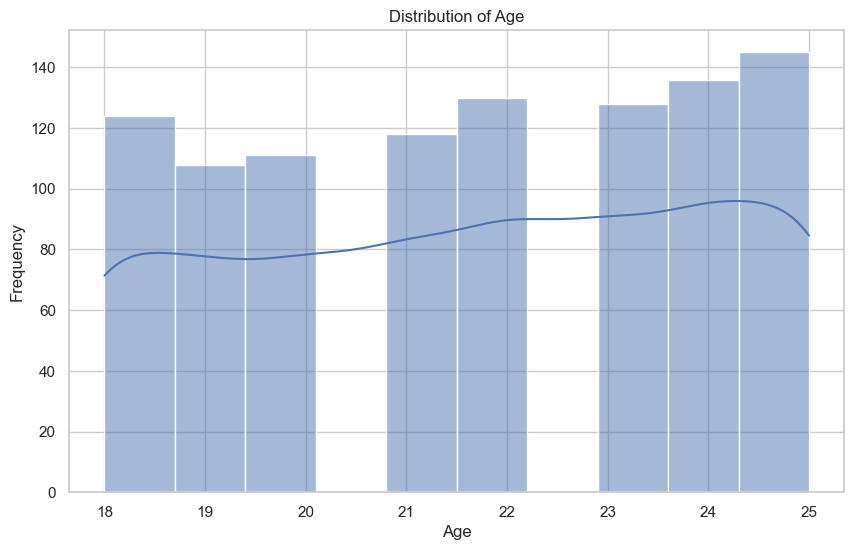

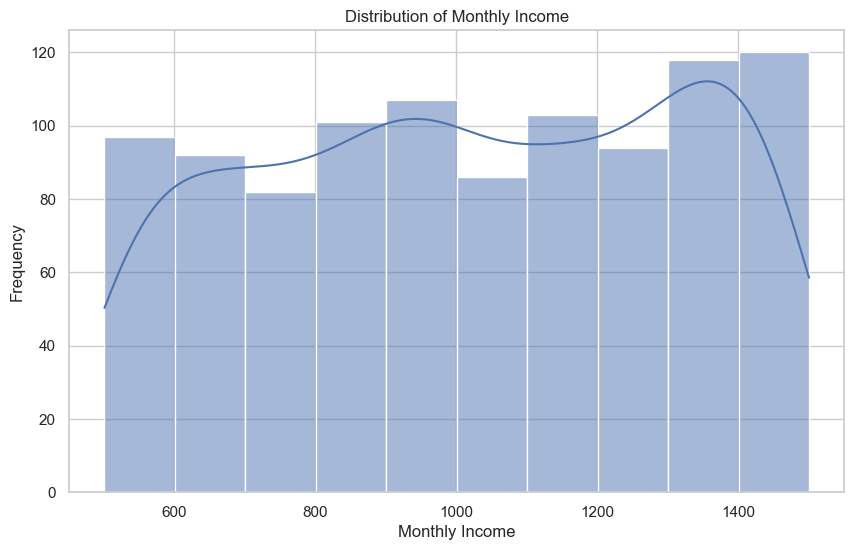

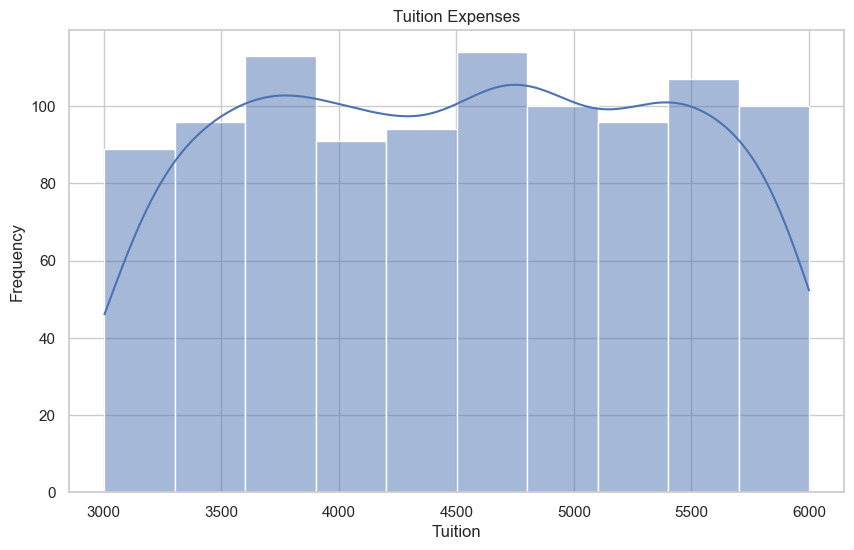

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=10, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Monthly Income
plt.figure(figsize=(10, 6))
sns.histplot(data['monthly_income'], bins=10, kde=True)
plt.title('Distribution of Monthly Income')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')
plt.show()

# Tuition Expenses
plt.figure(figsize=(10, 6))
sns.histplot(data['tuition'], bins=10, kde=True)
plt.title('Tuition Expenses')
plt.xlabel('Tuition')
plt.ylabel('Frequency')
plt.show()



**Here are the histograms visualizing the distribution of key variables:**

**Age Distribution:** The histogram shows the spread of ages among students. This can help us understand the age groups primarily represented in your dataset.

**Monthly Income Distribution:** This graph shows how monthly income is distributed among students, which could be correlated to their spending habits.

**Tuition Expenses:** The distribution of tuition fees can be analyzed to see how much students are spending on education and how it might affect their other spending habits.

**Step 4: Data Visualization**

**1. Preferred Payment Methods Among Students:**

The count plot illustrates the distribution of preferred payment methods among students. This visualization can help understand which payment methods are most popular and might influence how services are offered or targeted towards students.

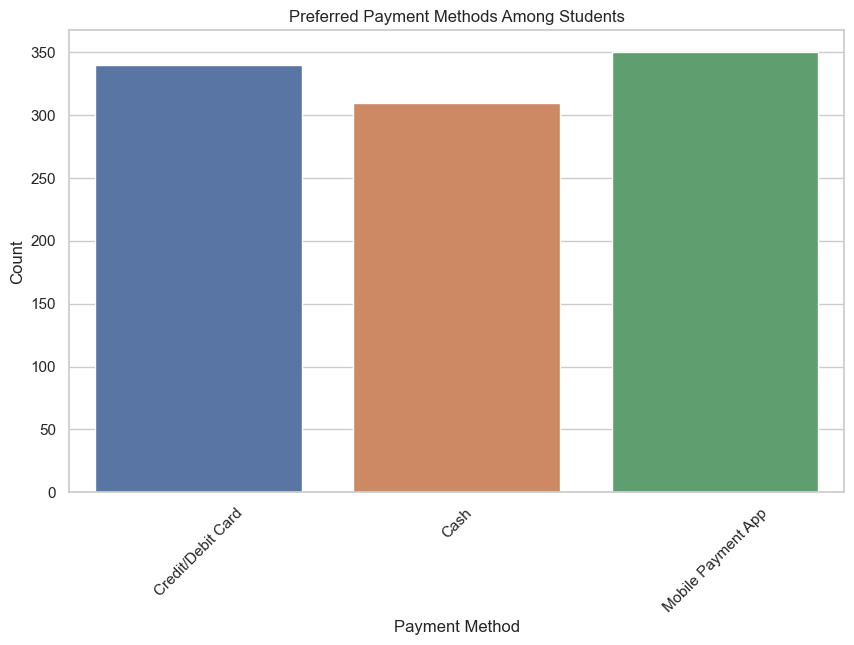

In [10]:
# Count of preferred payment methods
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='preferred_payment_method')
plt.title('Preferred Payment Methods Among Students')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


**2. Average Spending on Housing and Food by Major:**

This bar chart displays the average spending on housing and food categorized by major. It helps to identify which majors might have higher living expenses or food costs, potentially reflecting different lifestyles or city living costs associated with those fields of study.

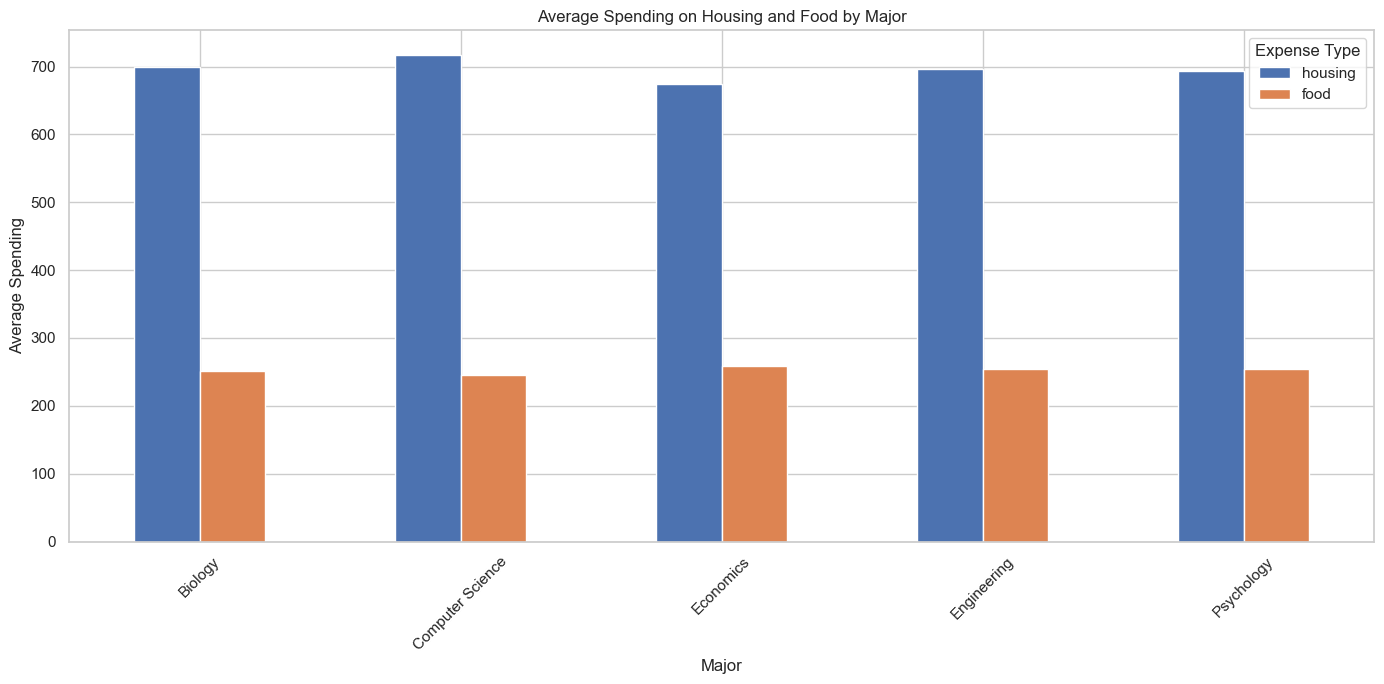

In [13]:
plt.figure(figsize=(14, 7))
data.groupby('major')[['housing', 'food']].mean().plot(kind='bar', ax=plt.gca())
plt.title('Average Spending on Housing and Food by Major')
plt.xlabel('Major')
plt.ylabel('Average Spending')
plt.xticks(rotation=45)
plt.legend(title='Expense Type')
plt.tight_layout()
plt.show()


**Step 5: Linear Regression Analysis**

We'll use the statsmodels library to perform linear regression analysis. This will provide a detailed summary of the regression results, including coefficients, R-squared value, and p-values for the predictors.

In [14]:
import statsmodels.api as sm

# Choose the independent variables
X = data[['age', 'monthly_income', 'tuition']]
# Add a constant to the model (the intercept)
X = sm.add_constant(X)

# Choose the dependent variable
y = data['food']

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
model_summary = model.summary()
model_summary


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   food   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5433
Date:                Tue, 16 Apr 2024   Prob (F-statistic):              0.653
Time:                        00:46:42   Log-Likelihood:                -5882.9
No. Observations:                1000   AIC:                         1.177e+04
Df Residuals:                     996   BIC:                         1.179e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            242.7343     30.811      7.878      0.000     182.273     303.196
age                1.1373      1.186      0.959      0.338      -1.190       3.465
monthly_income    -0.0053      0.009     -0.570      0.569      -0.024       0.013
tuition           -0.0021      0.003     -0.642      0.521      -0.008       0.004
==============================================================================
Omnibus:                      751.574   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.685
Skew:                          -0.050   Prob(JB):                     6.64e-14
Kurtosis:                       1.797   Cond. No.                     5.28e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.28e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

This code will construct a model that predicts food expenses based on age, monthly income, and tuition. Let's execute this and examine the output to understand the relationships between these variables.

Here's the summary of the linear regression model that predicts food expenses based on age, monthly income, and tuition:

**Regression Summary:**

**R-squared (R²):** 0.002. This value indicates that the model explains only 0.2% of the variability in food expenses. It suggests that these variables (age, monthly income, and tuition) do not strongly predict food expenses.

**Coefficients:**

**Age:** The coefficient for age is 1.1373, which suggests that for each additional year of age, food spending increases by approximately 1.14 units. However, the p-value is 0.338, indicating that this is not statistically significant.

**Monthly Income:** The coefficient is -0.0053, implying a very small decrease in food expenses with increasing monthly income. Again, with a p-value of 0.569, this is not statistically significant.

**Tuition:** The coefficient of -0.0021 indicates a slight decrease in food expenses with higher tuition fees. The p-value of 0.521 suggests that this relationship is not statistically significant.

**Considerations:**

**Statistical Significance:** None of the predictors are statistically significant, as indicated by their p-values being greater than the typical alpha level of 0.05.

**Model Fitness:** The low R² value suggests that other variables not included in the model might have a stronger influence on food expenses.